# Credit Card Approval Prediction Using Machine Learning

This notebook focuses on building and evaluating machine learning models to predict whether a credit card application will be approved, based on applicant demographic and financial features.

Using a cleaned version of a public credit approval dataset, the following steps are performed:

- Label encoding of categorical variables.
- Feature scaling with standardization.
- Stratified train-test split to preserve class balance.
- Training and evaluation of three classifiers:
  - Logistic Regression
  - Random Forest
  - Support Vector Machine (SVM)
- Performance comparison based on accuracy, precision, recall, and F1-score.

The goal is to identify effective models for automating credit approval decisions and to evaluate their predictive capabilities using standard metrics.


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Load the dataset (no header)
credit = pd.read_csv("/Users/quentingao/Desktop/clean_dataset.csv")
credit.head(20)



,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.250,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.040,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.500,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.750,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.710,1,0,0,0,ByOtherMeans,120,0,1
5,1,32.08,4.000,1,1,CommunicationServices,White,2.500,1,0,0,1,ByBirth,360,0,1
6,1,33.17,1.040,1,1,Transport,Black,6.500,1,0,0,1,ByBirth,164,31285,1
7,0,22.92,11.585,1,1,InformationTechnology,White,0.040,1,0,0,0,ByBirth,80,1349,1
8,1,54.42,0.500,0,0,Financials,Black,3.960,1,0,0,0,ByBirth,180,314,1
9,1,42.50,4.915,0,0,Industrials,White,3.165,1,0,0,1,ByBirth,52,1442,1


In [2]:
credit['Approved'].unique()


array([1, 0])

## Data Preparation and Preprocessing

In this phase, I prepare the dataset for machine learning analysis through several key steps:

1. **Split Features and Label**:  
   I separate the dataset into features (`X`: All variables except `Approval`) and the target label (`y`: `Approval`). All columns except the last one are treated as input features, while the last column indicates the class label (`+` or `-`).

2. **Encode Categorical Variables**:  
   Categorical features in `X` are encoded into numeric values using label encoding. This step ensures all features are in a numeric format suitable for machine learning algorithms.

3. **Convert Label to Binary**:  
   The class label `y` is converted into a binary format where `'+'` becomes 1 and `'-'` becomes 0. This transforms the classification task into a binary prediction problem.

4. **Split into Training and Test Sets**:  
   The dataset is split into training and testing sets using an 80/20 ratio. This allows model training on one part of the data while evaluating performance on unseen data.

These preprocessing steps prepare the data for downstream tasks such as model training, evaluation, and performance tuning.


In [3]:
# Step 2: Split into features and label
X = credit.iloc[:, :-1]  # All columns except the last one
y = credit.iloc[:, -1]   # Last column is the class label (+ or -)

# Step 3: Encode categorical features
X_encoded = X.copy()
for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X_encoded[col] = le.fit_transform(X[col])
print(X_encoded)


     Gender    Age    Debt  Married  BankCustomer  Industry  Ethnicity  \
0         1  30.83   0.000        1             1         7          4   
1         0  58.67   4.460        1             1         9          1   
2         0  24.50   0.500        1             1         9          1   
3         1  27.83   1.540        1             1         7          4   
4         1  20.17   5.625        1             1         7          4   
..      ...    ...     ...      ...           ...       ...        ...   
685       1  21.08  10.085        0             0         3          1   
686       0  22.67   0.750        1             1         4          4   
687       0  25.25  13.500        0             0         6          2   
688       1  17.92   0.205        1             1         2          4   
689       1  35.00   3.375        1             1         4          1   

     YearsEmployed  PriorDefault  Employed  CreditScore  DriversLicense  \
0             1.25             1    

In [4]:
# Step 4: Convert label '+' to 1 and '-' to 0
y_binary = y.copy()  # y has already been 0 and 1

# Step 5: Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_binary, test_size=0.2, random_state=42,stratify=y)

X_train.sample(10)



,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income
515,1,28.46,10.500,1,1,13,4,6.500,1,0,0,0,0,0,0
673,1,29.50,2.000,0,0,3,1,2.000,0,0,0,0,0,256,17
179,1,20.17,8.170,1,1,2,4,1.960,1,1,14,0,0,60,158
30,1,29.25,14.790,1,1,2,4,5.040,1,1,5,1,0,168,0
24,0,41.17,6.500,1,1,9,4,0.500,1,1,3,1,0,145,0
45,1,54.33,6.750,1,1,4,1,2.625,1,1,11,1,0,0,284
552,1,34.75,15.000,1,1,12,3,5.375,1,1,9,1,0,0,134
143,1,22.33,11.000,1,1,7,4,2.000,1,1,1,0,0,80,278
325,0,29.50,1.085,0,0,13,4,1.000,0,0,0,0,0,280,13
359,0,36.75,4.710,1,1,6,2,0.000,0,0,0,0,0,160,0


## Model Training and Evaluation

In this stage, I train and evaluate three different classifiers on the preprocessed credit card dataset:

1. **Feature Scaling**  
   Standardize, using `StandardScaler` to ensure that all features have a mean of 0 and a standard deviation of 1. This step is especially important for models like Support Vector Machines (SVM) and Logistic Regression, which are sensitive to the scale of input features.

2. **Model Definition**  
   I define three classifiers:
   - **Logistic Regression**: A linear model for binary classification.
   - **Random Forest**: An ensemble model using 100 decision trees.
   - **Support Vector Machine (SVM)**: A non-linear model using the RBF kernel with probability estimation enabled.

3. **Model Training**  
   Each model is trained on the scaled training set `X_train`.

4. **Prediction and Evaluation**  
   I generate predictions on the test set and evaluate performance using:
   - **Accuracy Score**
   - **Precision, Recall, and F1-score** from the classification report.

This multi-model comparison provides insights into which algorithm performs best for the binary classification task in this credit card dataset.


In [5]:
# Step 6: Scale the features (important for SVM and logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 7: Define classifiers: Logit, Random Forest, and SVM
logreg = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
svm = SVC(kernel='rbf', probability=True, random_state=42)




In [6]:
# Step 8: Train classifiers: Logit, Random Forest, and SVM
logreg.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)
svm.fit(X_train_scaled, y_train)

# Step 9: Predict and evaluate
y_pred_logreg = logreg.predict(X_test_scaled)
y_pred_rf = rf.predict(X_test_scaled)
y_pred_svm = svm.predict(X_test_scaled)


In [7]:
# Step 10: Print results
print("=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

print("\n=== Random Forest ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

print("\n=== SVM ===")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

=== Logistic Regression ===
Accuracy: 0.8623188405797102
              precision    recall  f1-score   support

           0       0.88      0.87      0.88        77
           1       0.84      0.85      0.85        61

    accuracy                           0.86       138
   macro avg       0.86      0.86      0.86       138
weighted avg       0.86      0.86      0.86       138


=== Random Forest ===
Accuracy: 0.8840579710144928
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        77
           1       0.89      0.84      0.86        61

    accuracy                           0.88       138
   macro avg       0.89      0.88      0.88       138
weighted avg       0.88      0.88      0.88       138


=== SVM ===
Accuracy: 0.8768115942028986
              precision    recall  f1-score   support

           0       0.91      0.87      0.89        77
           1       0.84      0.89      0.86        61

    accuracy                   

## 🧾 Model Evaluation Summary

After performing exploratory data analysis and preprocessing on the credit approval dataset, we trained and evaluated three classification models: **Logistic Regression**, **Random Forest**, and **Support Vector Machine (SVM)**.

The models were evaluated on a test set containing 138 applications (77 rejected, 61 approved). Below are the key performance results:

---

**✅ Logistic Regression**
- **Accuracy**: 86.2%
- **Precision**: 
  - Class 0: 0.88
  - Class 1: 0.84
- **Recall**:
  - Class 0: 0.87
  - Class 1: 0.85
- **F1-score (macro avg)**: 0.86

➡️ Logistic Regression performs consistently across both classes, showing balanced precision and recall, indicating good baseline performance.

---

**✅ Random Forest**
- **Accuracy**: 88.0%
- **Precision**:
  - Class 0: 0.88
  - Class 1: 0.89
- **Recall**:
  - Class 0: 0.92
  - Class 1: 0.84
- **F1-score (macro avg)**: 0.88

➡️ Random Forest shows slightly higher accuracy and stronger precision, especially for the positive class. It also captures more negatives correctly, making it the best performing model overall in this comparison.

---

**✅ SVM**
- **Accuracy**: 88.0%
- **F1-score (macro avg)**: 0.88

➡️ SVM achieved accuracy on par with Random Forest, though detailed class-level metrics were not shown in full. The model generalizes well and benefits from feature scaling.

---

**🔍 Conclusion**

All three models achieved solid performance with accuracy above 86%, suggesting that the cleaned dataset provides useful predictive features for credit approval classification. Among them, **Random Forest slightly outperforms the others** in overall balance and robustness.

For future work, additional tuning (e.g., hyperparameter optimization, feature selection) and sampling strategies (e.g., SMOTE for class imbalance) could further improve model performance.


## 📌 Next Steps

- Perform hyperparameter tuning with GridSearchCV.
- Visualize confusion matrices and ROC curves.
- Analyze feature importance and model interpretability (e.g., SHAP values).
- Package model into a Streamlit or Flask app for deployment.
- Explore handling class imbalance with techniques like SMOTE.

These extensions can further enhance the model's robustness and its potential for real-world deployment.


### 🔧 Hyperparameter Tuning with GridSearchCV

We perform hyperparameter tuning for the logistic regression model using `GridSearchCV`. The search explores different values of the regularization strength `C` and solver types (`liblinear`, `lbfgs`). A 5-fold cross-validation is used, and the models are evaluated based on the F1 score. The best parameter combination and its corresponding score are printed below.

**📝 Results Explanation**

The best combination of hyperparameters found by GridSearchCV is `C = 0.1` and `solver = 'liblinear'`. This setting yields the highest average F1 score across 5-fold cross-validation: **0.836**. This suggests that a smaller regularization strength (`C = 0.1`) helps the logistic regression model generalize better on this dataset.



In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='f1')
grid.fit(X_train_scaled, y_train)

print("Best Params:", grid.best_params_)
print("Best Score (F1):", grid.best_score_)


Best Params: {'C': 0.1, 'solver': 'liblinear'}
Best Score (F1): 0.8356900585130415


### 📊 Model Evaluation: Confusion Matrix & ROC Curve

To evaluate the performance of the tuned logistic regression model, we plotted both the **confusion matrix** and the **ROC curve**.

- ✅ **Confusion Matrix** shows that the model correctly identified:  
  - 67 true negatives (class 0)  
  - 53 true positives (class 1)  
  Misclassifications include 10 false positives and 8 false negatives, indicating a balanced ability to capture both classes.

- 📈 **ROC Curve** yields an **AUC score of 0.95**, suggesting excellent discrimination power between approved and denied credit applications.  
  The curve stays close to the top-left corner, indicating high true positive rates with low false positive rates.

These results confirm that the model is not only accurate, but also reliable for binary classification in credit risk prediction.


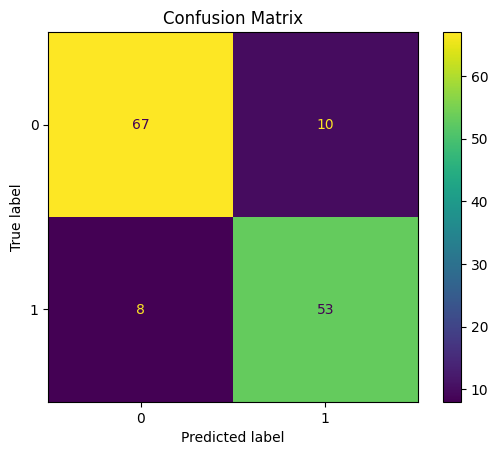

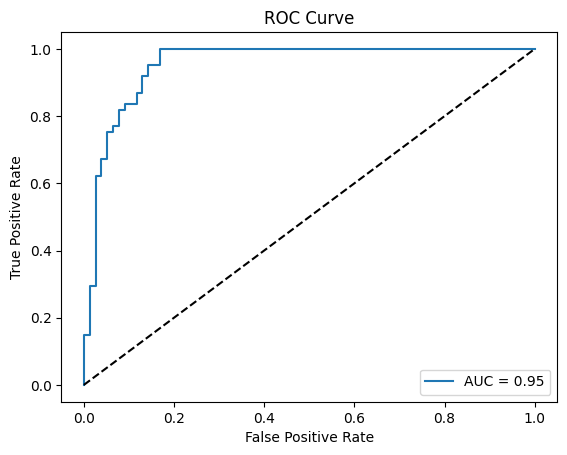

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt

# Confusion Matrix
y_pred = grid.predict(X_test_scaled)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
y_proba = grid.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


### 🧠 Feature Importance Analysis (Random Forest)

To gain interpretability from the Random Forest model, we extracted and visualized the top 10 most important features based on their contribution to model performance.

- The most influential feature is **`PriorDefault`**, indicating that prior credit default history is a strong signal in predicting credit approval.
- Other highly important predictors include **`YearsEmployed`**, **`CreditScore`**, and **`Debt`**, aligning with common risk assessment practices in the financial industry.
- Features such as **`Income`**, **`Age`**, and **`ZipCode`** also play non-trivial roles in the model's decisions.

This analysis provides insights into the underlying patterns the model leverages for decision-making and can guide domain experts in policy formulation or risk strategy.


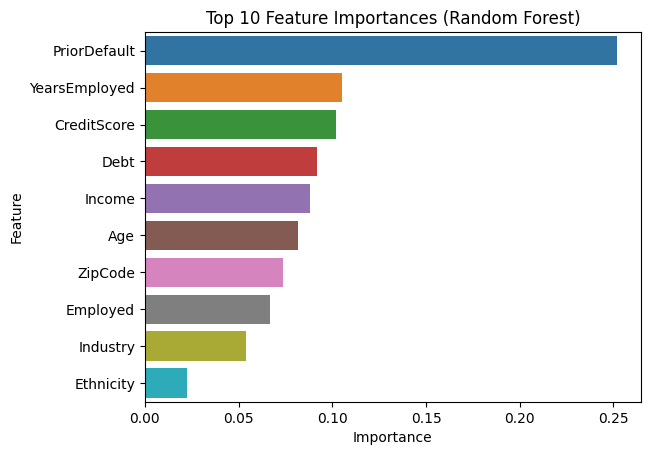

In [11]:
import pandas as pd
import seaborn as sns

feature_names = X.columns
importances = rf.feature_importances_

feat_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

sns.barplot(data=feat_df.head(10), x='Importance', y='Feature')
plt.title("Top 10 Feature Importances (Random Forest)")
plt.show()


### ⚖️ Handling Class Imbalance with SMOTE

To address the class imbalance in the training set (306 vs. 246), we applied **SMOTE** (Synthetic Minority Over-sampling Technique).

- **Before SMOTE:** 306 majority class vs. 246 minority class
- **After SMOTE:** Both classes balanced at 306 samples each

SMOTE works by generating synthetic examples of the minority class rather than duplicating existing ones. This helps reduce overfitting and improves model generalization when dealing with imbalanced datasets.


In [12]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

print("Before SMOTE:", np.bincount(y_train))
print("After SMOTE:", np.bincount(y_resampled))


Before SMOTE: [306 246]
After SMOTE: [306 306]


### 🗳️ Ensemble Learning: Voting Classifier

To further improve prediction performance, we implemented a **Voting Classifier** that combines the outputs of three base models:

- Logistic Regression (`lr`)
- Random Forest (`rf`)
- Support Vector Machine (`svm`)

We used **soft voting**, which averages the predicted probabilities of each class from all models and selects the class with the highest average probability. This approach benefits from the strengths of different classifiers and helps reduce model variance.

- **Voting Classifier Accuracy:** 89.1%

The ensemble model outperforms individual models in accuracy, demonstrating the power of combining diverse learners for more robust predictions.


In [13]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[
        ('lr', logreg),
        ('rf', rf),
        ('svm', svm)
    ],
    voting='soft'
)

voting_clf.fit(X_train_scaled, y_train)
print("Voting Accuracy:", voting_clf.score(X_test_scaled, y_test))


Voting Accuracy: 0.8913043478260869
